### Objective

To check the return type and behaviour of the HoughLines function in cv2.

### Conclusion

In version 4.5.4, HoughLines returns a numpy array. The snippet shown below is taken from the internet. On line 13, the original code read:

```for rho, theta in lines[0]```

This no longer works. The dimension on axis 1 apparently needs to be squeezed out.

Open CV version: 4.5.4


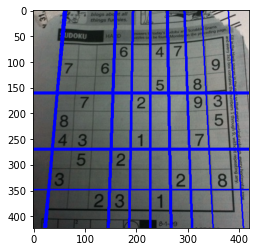

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(f"Open CV version: {cv2.__version__}")

img = cv2.imread('dave.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

for rho,theta in lines.squeeze():
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img, 'gray')

In [6]:
type(lines), lines.shape

(numpy.ndarray, (20, 1, 2))

In [9]:
lines.squeeze()

array([[ 2.7100000e+02,  1.5707964e+00],
       [ 2.6800000e+02,  1.5707964e+00],
       [ 2.2600000e+02,  0.0000000e+00],
       [ 1.9500000e+02,  1.7453292e-02],
       [ 1.6200000e+02,  3.4906585e-02],
       [ 1.5900000e+02,  3.4906585e-02],
       [-2.6200000e+02,  3.1241393e+00],
       [-2.9300000e+02,  3.1066861e+00],
       [ 1.9300000e+02,  1.7453292e-02],
       [ 2.2800000e+02,  0.0000000e+00],
       [ 1.6200000e+02,  1.5707964e+00],
       [ 6.2000000e+01,  8.7266460e-02],
       [-2.9500000e+02,  3.1066861e+00],
       [ 5.9000000e+01,  8.7266460e-02],
       [-2.5900000e+02,  3.1241393e+00],
       [ 1.5900000e+02,  1.5707964e+00],
       [ 3.4800000e+02,  1.5707964e+00],
       [-3.7800000e+02,  3.0717795e+00],
       [-3.2700000e+02,  3.0892327e+00],
       [ 6.4000000e+01,  1.0471976e-01]], dtype=float32)